# 概要

* アタポンの1位データに絞る
* ちょうど毎月開催されてるので、月次にしてみる
  * 「月の中で何日に開催された」とかは一旦考慮しない
* とりあえずpystan動かしてみる
  * 試しにローカルレベルモデルで動かす

# インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

# イベントデータ読み込み

In [2]:
input_dir = './data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].set_index('日付')
df

,イベント,1位,2001位,形式,属性,期間
日付,,,,,,
2015-09-25,アタシポンコツアンドロイド,427777,78330,アタポン,NaN,249.0
2015-10-19,Nation Blue,324369,67627,アタポン,NaN,198.0
2015-11-20,Orange Sapphire,350000,42944,アタポン,NaN,150.0
2015-12-18,Snow Wings,520000,50954,アタポン,NaN,222.0
2016-01-20,パステルピンクな恋,602529,43854,アタポン,NaN,174.0
2016-02-18,オルゴールの小箱,523819,56737,アタポン,NaN,174.0
2016-03-20,絶対特権主張しますっ！,530000,51353,アタポン,NaN,174.0
2016-04-19,つぼみ,666666,47907,アタポン,NaN,174.0
2016-05-19,明日また会えるよね,844167,58517,アタポン,NaN,198.0


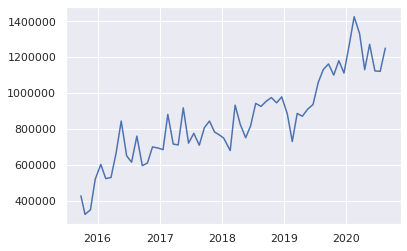

In [4]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '1位']
ax.plot(x, y)
plt.show()

# stanデータ準備

In [5]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'y':       df['1位'].tolist(), # 観測値
}

In [6]:
# Stanコード
model = """
data {
  int T;                   // データ取得期間の長さ
  vector[T] y;       // 観測値
}
parameters {
  vector[T] mu;
  real<lower=0> s_w;
  real<lower=0> s_v;
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1], s_w);
    y[i] ~ normal(mu[i], s_v);
  }
}
"""

# Stan実行

In [7]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9cc615073c76f7ff6f48a585e7177de5 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpmmoh3mcd\stanfit4anon_model_9cc615073c76f7ff6f48a585e7177de5_7896915474488968734.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 24.9 s


In [8]:
# パラメータ設定
n_itr = 5000
n_warmup = n_itr - 1000
chains = 3

In [9]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

Wall time: 7.01 s


In [10]:
# ファイル保存
save_dir = './data/'
with open(save_dir + 'c1_model.pickle', mode="wb") as f:
    pickle.dump(stm, f)
with open(save_dir + 'c1_fit.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  


# 結果確認

In [11]:
fit

Inference for Stan model: anon_model_9cc615073c76f7ff6f48a585e7177de5.
3 chains, each with iter=5000; warmup=4000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]   3.7e5  1602.2  8.8e4  1.9e5  3.1e5  3.7e5  4.3e5  5.4e5   3000    1.0
mu[1]   3.7e5  1436.4  5.7e4  2.6e5  3.3e5  3.7e5  4.1e5  4.8e5   1556    1.0
mu[2]   4.0e5  904.12  5.0e4  3.1e5  3.7e5  4.0e5  4.4e5  5.0e5   3000    1.0
mu[3]   4.9e5  796.06  4.4e4  4.1e5  4.6e5  4.9e5  5.2e5  5.8e5   3000    1.0
mu[4]   5.5e5  828.92  4.5e4  4.6e5  5.2e5  5.5e5  5.8e5  6.4e5   3000    1.0
mu[5]   5.5e5  768.77  4.2e4  4.7e5  5.2e5  5.5e5  5.8e5  6.3e5   3000    1.0
mu[6]   5.8e5  808.97  4.4e4  4.9e5  5.5e5  5.8e5  6.1e5  6.7e5   3000    1.0
mu[7]   6.6e5  797.37  4.4e4  5.7e5  6.3e5  6.6e5  6.8e5  7.4e5   3000    1.0
mu[8]   7.3e5  1990.4  5.7e4  6.2e5  6.9e5  7.3e5  7.7e5  8.4e5    806   1.01
mu[9]   6.8e5  794.08  4.3e4  5

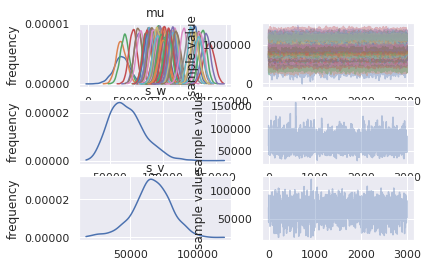

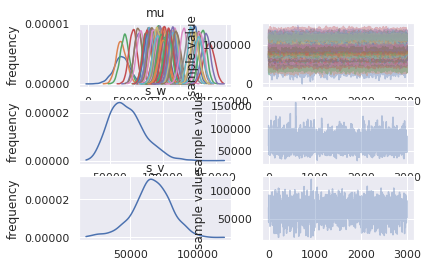

In [12]:
fit.plot()

In [13]:
#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

#x軸
X = df.index

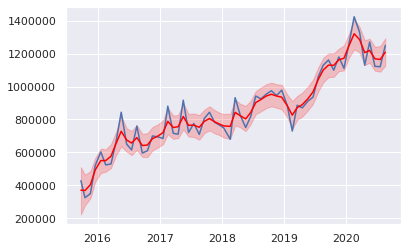

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
# ax.plot(X, mu, label='true trend', c='green')
ax.plot(X, mu_mean, label='predicted trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

ちょいちょい外れてるが、そこそこ当てはまってる

# 残差確認

In [15]:
df['predict'] = mu_mean
# 予測とのズレ（比）
df['diff'] = df['1位'] - df['predict']
df.drop(['2001位', '形式', '属性'], axis=1, inplace=True)

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


In [16]:
df.head()

,イベント,1位,期間,predict,diff
日付,,,,,
2015-09-25,アタシポンコツアンドロイド,427777,249.0,370279.604034,57497.395966
2015-10-19,Nation Blue,324369,198.0,368418.893523,-44049.893523
2015-11-20,Orange Sapphire,350000,150.0,403841.512332,-53841.512332
2015-12-18,Snow Wings,520000,222.0,492999.053749,27000.946251
2016-01-20,パステルピンクな恋,602529,174.0,550261.445335,52267.554665


In [17]:
# 残差の二乗の平均
"{:,}".format(((df['diff'])**2).sum() / len(df))

'2,240,224,040.608232'

In [18]:
df.corr()

,1位,期間,predict,diff
1位,1.000000,0.100235,0.980556,0.326086
期間,0.100235,1.000000,-0.017857,0.592173
predict,0.980556,-0.017857,1.000000,0.134230
diff,0.326086,0.592173,0.134230,1.000000


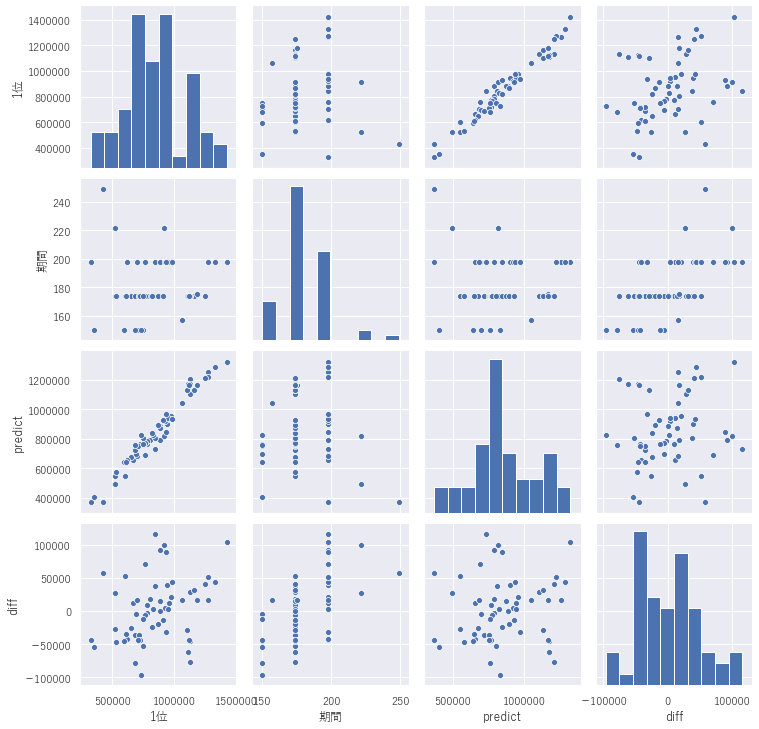

In [19]:
# 期間と相関あり
sns.set(font='Yu Gothic')
sns.pairplot(df)